Tiem series assignment 
Oksana Goljevacki

BACKGROUND: 

The data contains monthly sales (in million USD) of a leading processed food manufacturer in USA. Data for 3 business units, from February 2015 to January 2018, is provided in the same file. 

Columns – Year, Month, BU1, BU2, BU3

Number of observations – 36 for each business unit

 

QUESTIONS-

Import ‘USA Firm Sales’ data in R/PYTHON

Create time series objects of the data.

Check for stationarity for each of the three series.

Obtain best model for each BU.

Predict sales for each BU for January 2018, February 2018, March 2018. 



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch.unitroot import ADF 
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Import ‘USA Firm Sales’ data in R/PYTHON

In [5]:
df=pd.read_csv('C:/Users/duoxa/Desktop/TS_module/USA FIRM SALES DATA.csv')
df.head()

,Year,Month,BU1,BU2,BU3
0,2015,February,125.1,115.5,113.8
1,2015,March,123.6,115.7,113.8
2,2015,April,123.1,116.5,114.0
3,2015,May,123.1,117.7,114.1
4,2015,June,123.4,118.3,114.7


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    35 non-null     int64  
 1   Month   35 non-null     object 
 2   BU1     35 non-null     float64
 3   BU2     35 non-null     float64
 4   BU3     35 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ KB


In [9]:
# Convert Month and Year to datetime
df['Date'] = df.apply(lambda row: datetime.strptime(f"{row['Month']} {row['Year']}", "%B %Y"), axis=1)
df.set_index('Date', inplace=True)
df.drop(['Year', 'Month'], axis=1, inplace=True)

# Create full monthly index (from 1 Feb 2015 to 31 Dec 2017)
rng = pd.date_range(start="2015-02-01", end="2017-12-31", freq='MS')

# Reindex the DataFrame
df = df.reindex(rng)
df.index.name = 'Date'


In [8]:
df.head()

,BU1,BU2,BU3
Date,,,
2015-02-01,125.1,115.5,113.8
2015-03-01,123.6,115.7,113.8
2015-04-01,123.1,116.5,114.0
2015-05-01,123.1,117.7,114.1
2015-06-01,123.4,118.3,114.7


In [11]:
df.tail()

,BU1,BU2,BU3
Date,,,
2017-08-01,133.7,129.4,125.3
2017-09-01,135.2,128.8,125.5
2017-10-01,139.0,129.4,125.9
2017-11-01,140.6,129.8,126.8
2017-12-01,139.0,131.0,127.5


In [10]:
print(df.index.name)#just check 


Date


# Create time series objects of the data.

In [13]:

# Create a monthly date range matching the number of rows
rng = pd.date_range(start=df.index.min(), periods=len(df), freq='MS')

# Extract values for each business unit
s1 = df['BU1'].values
s2 = df['BU2'].values
s3 = df['BU3'].values

# Create monthly time series for each business unit
bu1_series = pd.Series(s1, index=rng)
bu2_series = pd.Series(s2, index=rng)
bu3_series = pd.Series(s3, index=rng)

# Combine into one DataFrame
df_monthly = pd.DataFrame({
    'BU1': bu1_series,
    'BU2': bu2_series,
    'BU3': bu3_series
})

# Display the result
print(df_monthly.tail())

              BU1    BU2    BU3
2017-08-01  133.7  129.4  125.3
2017-09-01  135.2  128.8  125.5
2017-10-01  139.0  129.4  125.9
2017-11-01  140.6  129.8  126.8
2017-12-01  139.0  131.0  127.5


# Check for stationarity for each of the three series.

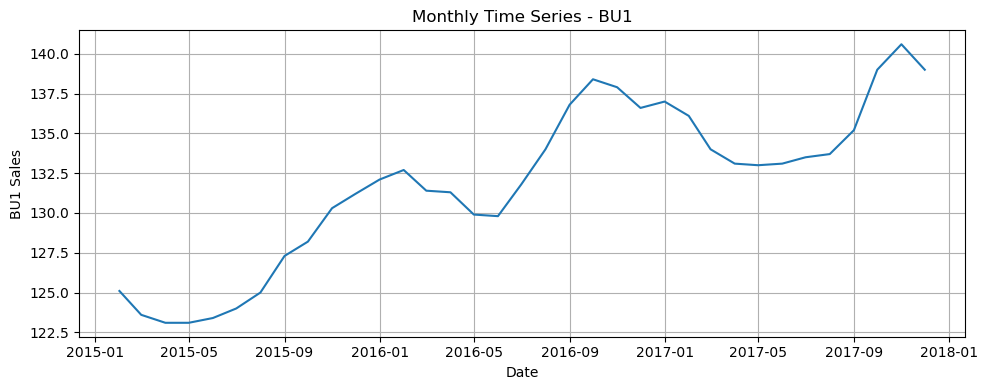

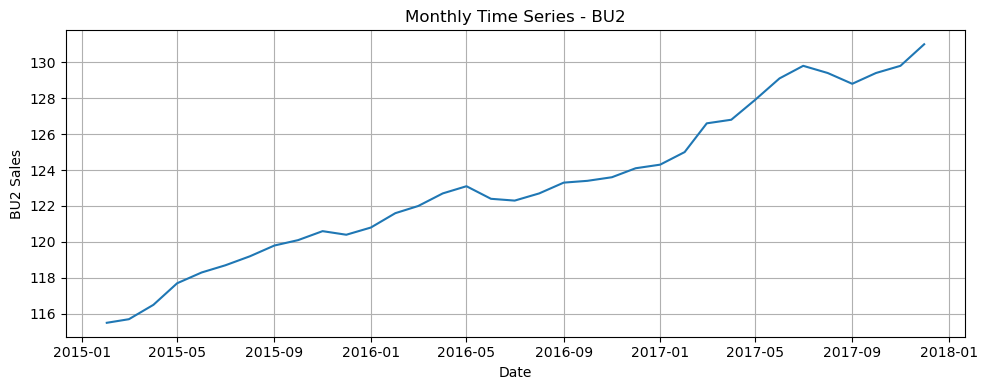

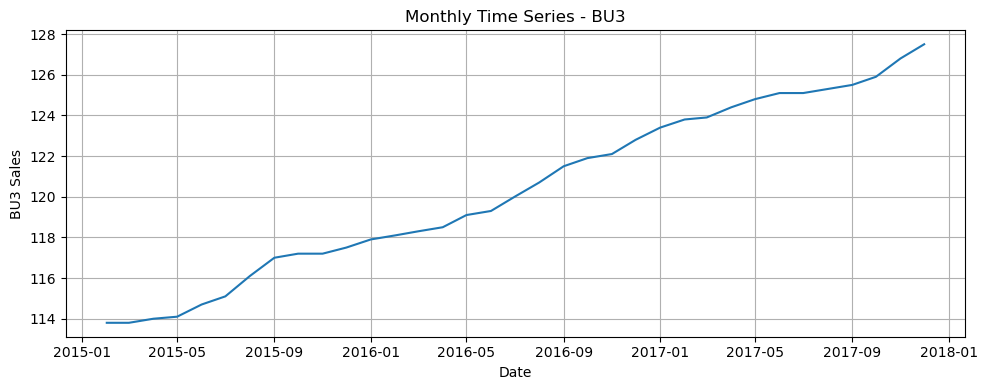

In [15]:
# Plot BU1
plt.figure(figsize=(10, 4))
plt.plot(df_monthly['BU1'])
plt.title('Monthly Time Series - BU1')
plt.xlabel('Date')
plt.ylabel('BU1 Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot BU2
plt.figure(figsize=(10, 4))
plt.plot(df_monthly['BU2'])
plt.title('Monthly Time Series - BU2')
plt.xlabel('Date')
plt.ylabel('BU2 Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot BU3
plt.figure(figsize=(10, 4))
plt.plot(df_monthly['BU3'])
plt.title('Monthly Time Series - BU3')
plt.xlabel('Date')
plt.ylabel('BU3 Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
#The time series plots for BU1, BU2, and BU3 show upward trends, confirming their non-stationary nature as supported by the ADF test.

In [16]:
#ADF test or Dickey Fuller Test

In [17]:
from arch.unitroot import ADF

# Apply ADF test with no lags and no trend
adf_bu1 = ADF(bu1_series, lags=0, trend='n')
adf_bu2 = ADF(bu2_series, lags=0, trend='n')
adf_bu3 = ADF(bu3_series, lags=0, trend='n')

# Display summaries
print("ADF Test for BU1:")
print(adf_bu1.summary())

print("\nADF Test for BU2:")
print(adf_bu2.summary())

print("\nADF Test for BU3:")
print(adf_bu3.summary())


ADF Test for BU1:
   Augmented Dickey-Fuller Results   
Test Statistic                  1.683
P-value                         0.978
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.63 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

ADF Test for BU2:
   Augmented Dickey-Fuller Results   
Test Statistic                  5.295
P-value                         1.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.63 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

ADF Test for BU3:
   Augmented Dickey-Fuller Results   
Test Statistic                  8.486
P-value                         1.000
Lags                                0
-------------------------------------

Trend: No Trend

In [21]:
# Import the ADF test
from statsmodels.tsa.stattools import adfuller

# Define the ADF test function
def adf_test(series, name):
    result = adfuller(series.dropna())  # Ensure no NaNs are passed
    print(f"\nADF Test for {name}:")
    print(f"  Test Statistic : {result[0]:.4f}")
    print(f"  p-value        : {result[1]:.4f}")
    print(f"  Stationary     : {'Yes' if result[1] < 0.05 else 'No'}")
    print("  Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.4f}")

# Ensure first differenced series exist
bu1_diff = bu1_series.diff().dropna()
bu2_diff = bu2_series.diff().dropna()
bu3_diff = bu3_series.diff().dropna()

# Run ADF tests
adf_test(bu1_diff, 'BU1 (1st Difference)')
adf_test(bu2_diff, 'BU2 (1st Difference)')
adf_test(bu3_diff, 'BU3 (1st Difference)')



ADF Test for BU1 (1st Difference):
  Test Statistic : -1.3658
  p-value        : 0.5985
  Stationary     : No
  Critical Values:
    1%: -3.7529
    5%: -2.9985
    10%: -2.6390

ADF Test for BU2 (1st Difference):
  Test Statistic : -4.2098
  p-value        : 0.0006
  Stationary     : Yes
  Critical Values:
    1%: -3.6461
    5%: -2.9541
    10%: -2.6160

ADF Test for BU3 (1st Difference):
  Test Statistic : -3.9833
  p-value        : 0.0015
  Stationary     : Yes
  Critical Values:
    1%: -3.6461
    5%: -2.9541
    10%: -2.6160


In [23]:
# Second differencing for BU1  needed
bu1_diff2 = bu1_diff.diff().dropna()
adf_test(bu1_diff2, 'BU1 (2nd Difference)')




ADF Test for BU1 (2nd Difference):
  Test Statistic : -2.9197
  p-value        : 0.0431
  Stationary     : Yes
  Critical Values:
    1%: -3.7697
    5%: -3.0054
    10%: -2.6425


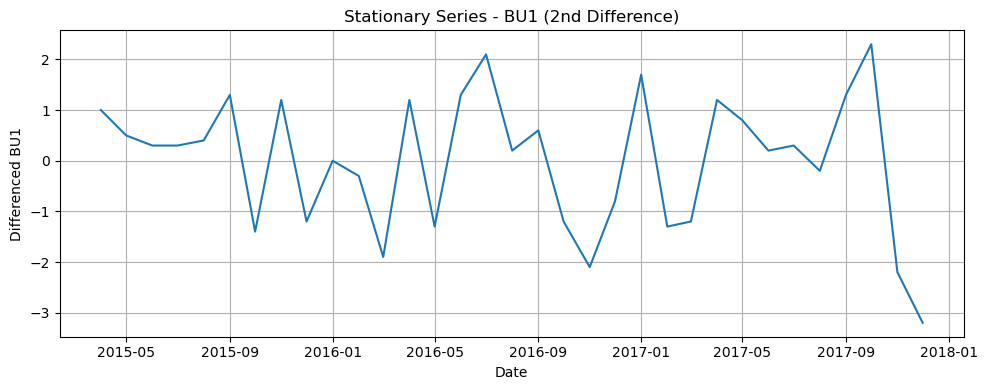

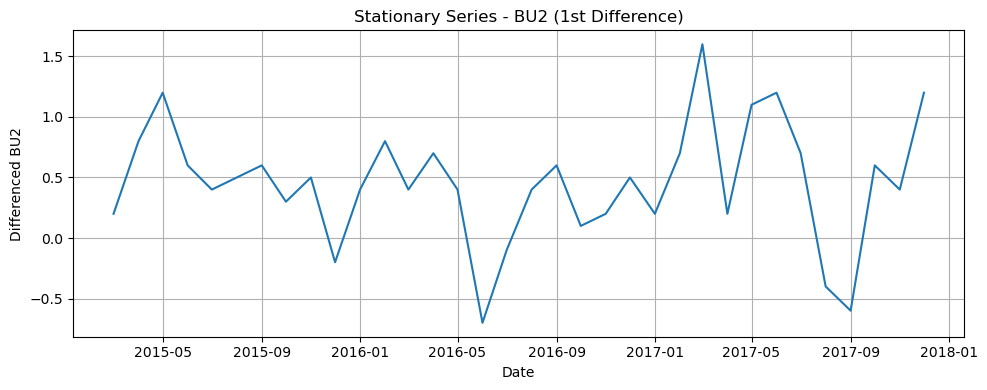

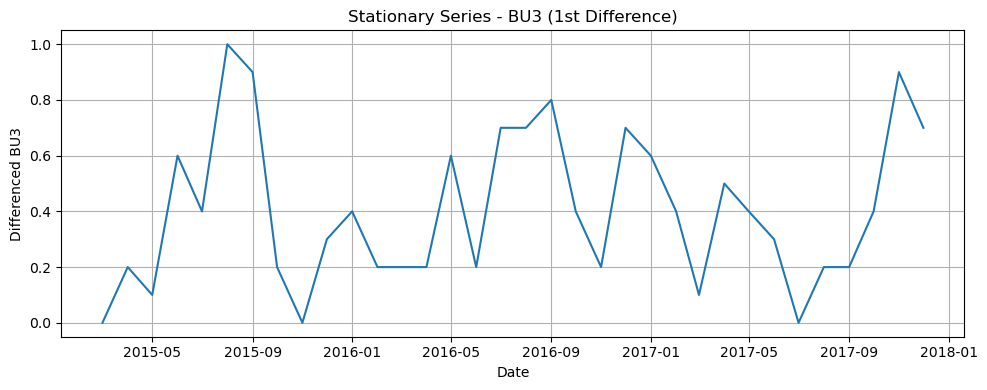

In [25]:

# Plot BU1 stationary series
plt.figure(figsize=(10, 4))
plt.plot(bu1_diff2)
plt.title('Stationary Series - BU1 (2nd Difference)')
plt.xlabel('Date')
plt.ylabel('Differenced BU1')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot BU2 stationary series
plt.figure(figsize=(10, 4))
plt.plot(bu2_diff)
plt.title('Stationary Series - BU2 (1st Difference)')
plt.xlabel('Date')
plt.ylabel('Differenced BU2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot BU3 stationary series
plt.figure(figsize=(10, 4))
plt.plot(bu3_diff)
plt.title('Stationary Series - BU3 (1st Difference)')
plt.xlabel('Date')
plt.ylabel('Differenced BU3')
plt.grid(True)
plt.tight_layout()
plt.show()

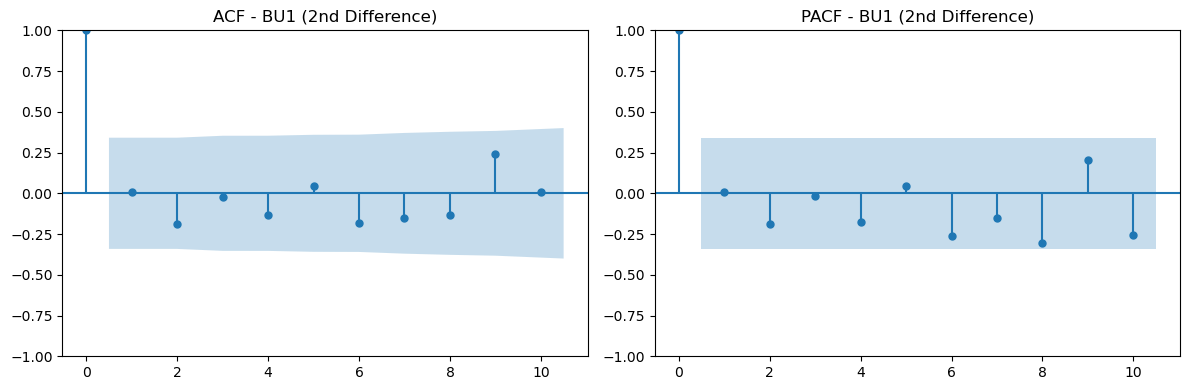

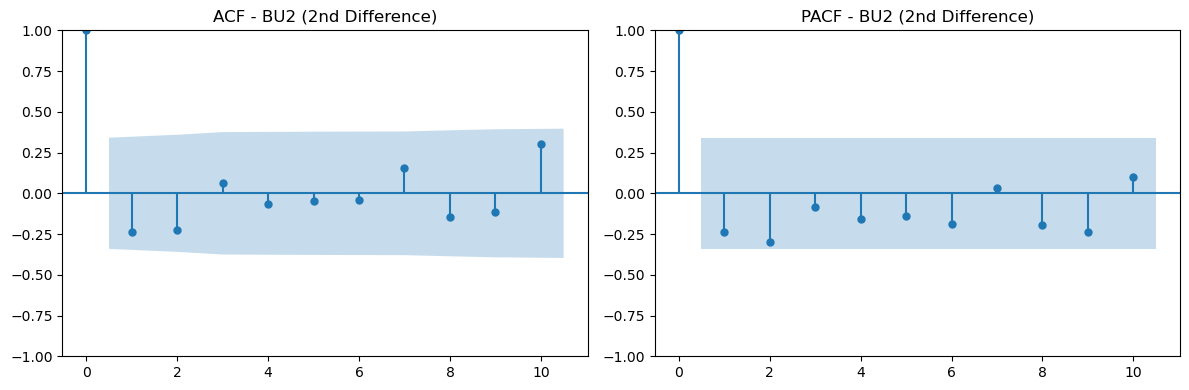

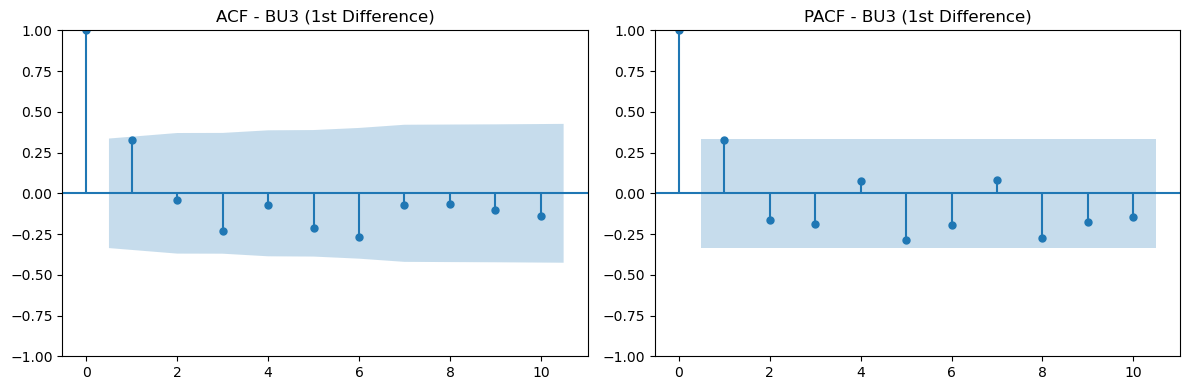

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define stationary versions of each BU series
bu1_stationary = bu1_series.diff().dropna().diff().dropna()
bu2_stationary = bu2_series.diff().dropna().diff().dropna()
bu3_stationary = bu3_series.diff().dropna()

# Set lag count safely based on series length
safe_lags = 10

# BU1
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(bu1_stationary, ax=axes[0], lags=safe_lags)
axes[0].set_title('ACF - BU1 (2nd Difference)')
plot_pacf(bu1_stationary, ax=axes[1], lags=safe_lags, method='ywm')
axes[1].set_title('PACF - BU1 (2nd Difference)')
plt.tight_layout()
plt.show()

# BU2
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(bu2_stationary, ax=axes[0], lags=safe_lags)
axes[0].set_title('ACF - BU2 (2nd Difference)')
plot_pacf(bu2_stationary, ax=axes[1], lags=safe_lags, method='ywm')
axes[1].set_title('PACF - BU2 (2nd Difference)')
plt.tight_layout()
plt.show()

# BU3
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(bu3_stationary, ax=axes[0], lags=safe_lags)
axes[0].set_title('ACF - BU3 (1st Difference)')
plot_pacf(bu3_stationary, ax=axes[1], lags=safe_lags, method='ywm')
axes[1].set_title('PACF - BU3 (1st Difference)')
plt.tight_layout()
plt.show()


# Obtain best model for each BU.

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

def choose_best_arima(series, orders):
    best_model = None
    best_aic = float('inf')
    best_result = None

    for order in orders:
        try:
            model = ARIMA(series, order=order).fit()
            resid = model.resid.dropna()
            lb_pvalue = acorr_ljungbox(resid, lags=[5], return_df=True)['lb_pvalue'].iloc[0]
            if model.aic < best_aic and lb_pvalue > 0.05:
                best_aic = model.aic
                best_model = model
                best_result = {
                    'order': order,
                    'aic': model.aic,
                    'lb_pvalue': lb_pvalue,
                    'model': model
                }
        except:
            continue

    return best_result


In [29]:
import warnings
warnings.filterwarnings("ignore")

orders = [(0,2,0), (1,2,0), (1,2,1), (2,2,1), (1,1,1)]

best_bu1 = choose_best_arima(bu1_series, orders)
best_bu2 = choose_best_arima(bu2_series, orders)
best_bu3 = choose_best_arima(bu3_series, orders)


print("Best BU1:", best_bu1['order'], "AIC:", best_bu1['aic'])
print("Best BU2:", best_bu2['order'], "AIC:", best_bu2['aic'])
print("Best BU3:", best_bu3['order'], "AIC:", best_bu3['aic'])




Best BU1: (1, 1, 1) AIC: 111.88302102434696
Best BU2: (1, 2, 1) AIC: 55.05885835773054
Best BU3: (1, 2, 1) AIC: 13.800536152052102


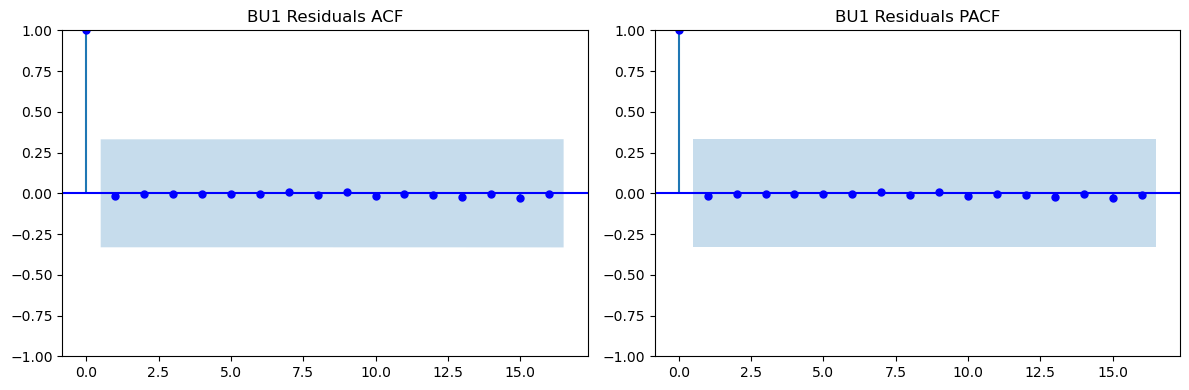


Ljung-Box Test for BU1:
  Statistic : 0.0105
  p-value   : 1.0000
 Residuals resemble white noise.


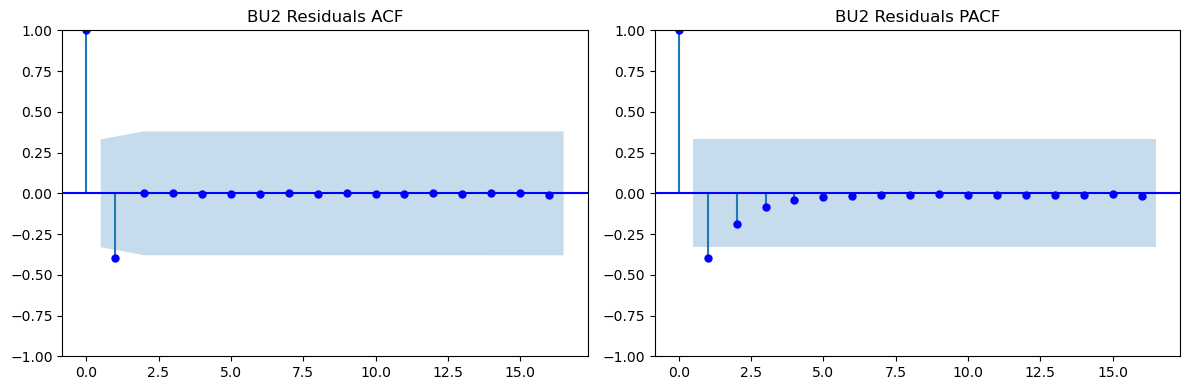


Ljung-Box Test for BU2:
  Statistic : 6.0252
  p-value   : 0.3038
 Residuals resemble white noise.


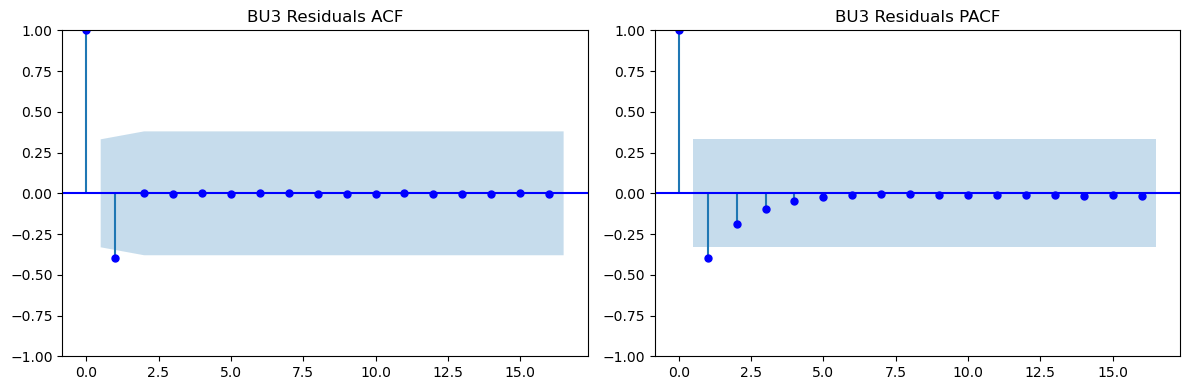


Ljung-Box Test for BU3:
  Statistic : 6.0195
  p-value   : 0.3043
 Residuals resemble white noise.


In [31]:
# Function to plot ACF and PACF
def plot_diagnostics(residuals, bu_label):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ACF
    plot_acf(residuals, ax=axes[0], title=f'{bu_label} Residuals ACF', color='blue')

    # PACF
    plot_pacf(residuals, ax=axes[1], title=f'{bu_label} Residuals PACF', color='blue')

    plt.tight_layout()
    plt.show()

# Function to perform full diagnostics
def run_diagnostics(best_model_result, bu_label):
    residuals = best_model_result['model'].resid.dropna()
    
    # Plot ACF & PACF
    plot_diagnostics(residuals, bu_label)
    
    # Ljung-Box Test
    lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
    lb_stat = lb_test['lb_stat'].iloc[0]
    lb_pval = lb_test['lb_pvalue'].iloc[0]
    
    print(f"\nLjung-Box Test for {bu_label}:")
    print(f"  Statistic : {lb_stat:.4f}")
    print(f"  p-value   : {lb_pval:.4f}")
    if lb_pval > 0.05:
        print(" Residuals resemble white noise.")
    else:
        print(" Residuals may still be autocorrelated.")

# Run diagnostics for BU1, BU2, BU3
run_diagnostics(best_bu1, "BU1")
run_diagnostics(best_bu2, "BU2")
run_diagnostics(best_bu3, "BU3")


| BU  | Ljung-Box p-value | Conclusion                |
| --- | ----------------- | --------------------------|
| BU1 | 1.0000            | Residuals are white noise |
| BU2 | 0.3038            | Residuals are white noise |
| BU3 | 0.3043            | Residuals are white noise |


ARIMA models are well-fitted.

# Predict sales for each BU for January 2018, February 2018, March 2018.

In [29]:
import pandas as pd

# Forecast 3 months ahead for each BU
forecast_bu1 = best_bu1['model'].get_forecast(steps=3)
forecast_bu2 = best_bu2['model'].get_forecast(steps=3)
forecast_bu3 = best_bu3['model'].get_forecast(steps=3)

# Extract forecasted values
pred_bu1 = forecast_bu1.predicted_mean
pred_bu2 = forecast_bu2.predicted_mean
pred_bu3 = forecast_bu3.predicted_mean

# Create date index for Jan-Mar 2018
forecast_dates = pd.date_range(start='2018-01-01', periods=3, freq='MS')

# Combine into a DataFrame
forecast_df = pd.DataFrame({
    'Month': forecast_dates.strftime('%B %Y'),
    'BU1 Forecast': pred_bu1.values,
    'BU2 Forecast': pred_bu2.values,
    'BU3 Forecast': pred_bu3.values
})

# Display results
print(forecast_df)


           Month  BU1 Forecast  BU2 Forecast  BU3 Forecast
0   January 2018    137.780716    131.663448    128.018708
1  February 2018    137.487613    132.180007    128.466046
2     March 2018    137.417154    132.656353    128.885286


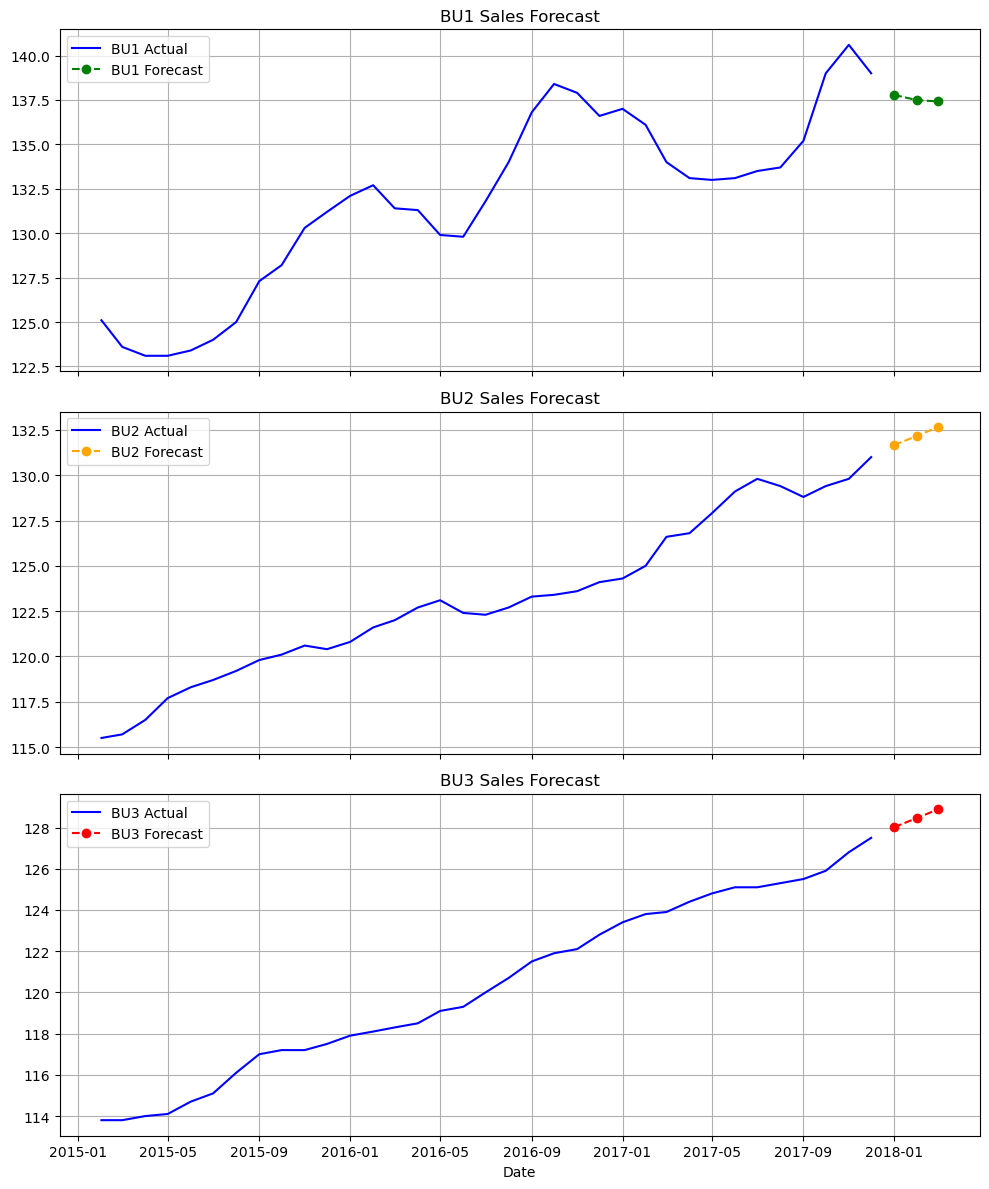

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare forecast and actual series for all BUs
bus = {
    'BU1': (bu1_series, best_bu1, 'green'),
    'BU2': (bu2_series, best_bu2, 'orange'),
    'BU3': (bu3_series, best_bu3, 'red')
}

# Plot setup
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

for i, (label, (series, model_info, color)) in enumerate(bus.items()):
    # Forecast next 3 months
    forecast = model_info['model'].get_forecast(steps=3)
    pred = forecast.predicted_mean
    forecast_index = pd.date_range(start=series.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')
    
    # Plot actuals
    axes[i].plot(series.index, series, label=f'{label} Actual', color='blue')
    
    # Plot forecast
    axes[i].plot(forecast_index, pred, label=f'{label} Forecast', color=color, linestyle='--', marker='o')
    
    axes[i].set_title(f'{label} Sales Forecast')
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()


I applied ARIMA models to forecast sales for BU1, BU2, and BU3. After checking the residuals, all three models showed no significant autocorrelation, which means the models are appropriate. The forecasts for January to March 2018 follow the historical patterns and can be considered reliable for short-term planning.